<a href="https://colab.research.google.com/github/HarshithRKumar/Machine-Learning-Models/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/abalone cluster data.csv')
df.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df=df.drop(columns=['Type','LongestShell','WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings'])
df.head()

,Diameter,Height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080


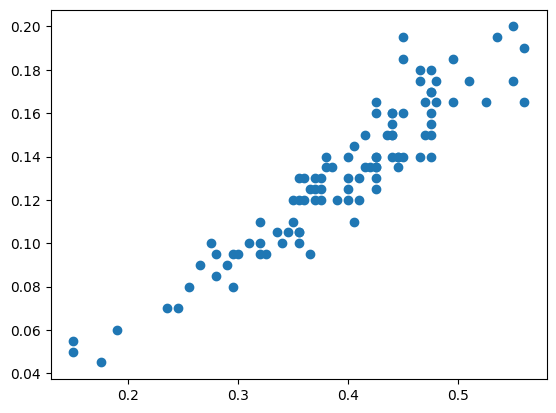

In [ ]:
df=df.iloc[:100]
import matplotlib.pyplot as plt
plt.scatter(df['Diameter'],df['Height'])
plt.show()

In [ ]:
# lebow method for finding k value
from sklearn.cluster import KMeans
kr=range(1,10)
sse=[] #sum of squared error
for k in kr:
  km=KMeans(n_clusters=k)
  km.fit(df[['Diameter','Height']])
  sse.append(km.inertia_)

print(sse)

[0.8482770000000001, 0.31687895833333346, 0.17047713336460293, 0.11305533380018674, 0.0766393127705628, 0.045990114348370935, 0.035247331899266876, 0.02876877037178508, 0.024414349547511306]


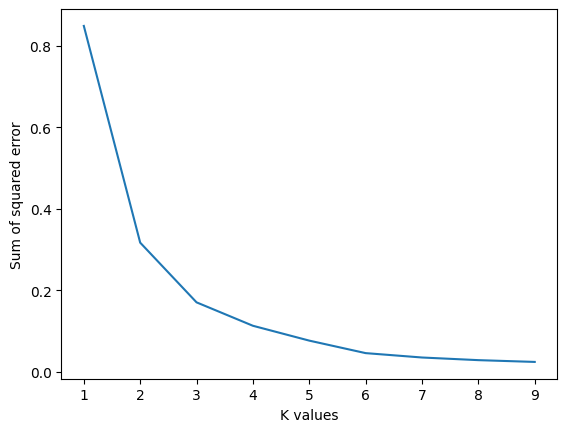

In [ ]:
plt.xlabel('K values')
plt.ylabel('Sum of squared error')
plt.plot(kr,sse)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Diameter','Height']]=scaler.fit_transform(df[['Diameter','Height']])
df.head()

,Diameter,Height
0,0.524390,0.322581
1,0.280488,0.290323
2,0.658537,0.580645
3,0.524390,0.516129
4,0.256098,0.225806


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Diameter','Height']])
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_pred
df.head()

,Diameter,Height,cluster
0,0.524390,0.322581,1
1,0.280488,0.290323,1
2,0.658537,0.580645,0
3,0.524390,0.516129,0
4,0.256098,0.225806,1


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df[['Diameter','Height']],df['cluster'])

np.float64(0.47879770267247146)

In [ ]:
km.cluster_centers_

array([[0.61945676, 0.56085044],
       [0.33197832, 0.27718041],
       [0.80992431, 0.810901  ]])

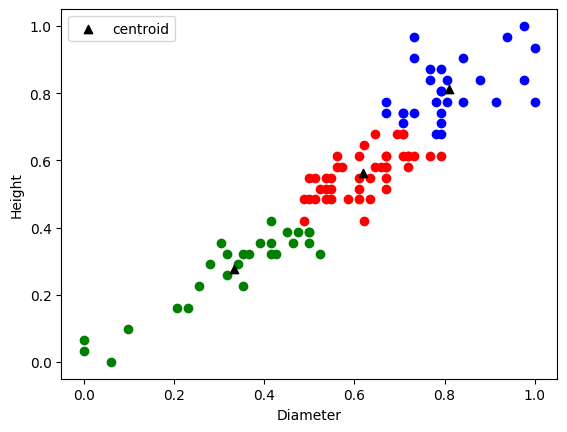

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Diameter'],df1['Height'],color='red')
plt.scatter(df2['Diameter'],df2['Height'],color='green')
plt.scatter(df3['Diameter'],df3['Height'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='^',label='centroid')
plt.legend()
plt.xlabel('Diameter')
plt.ylabel('Height')
plt.show()